In [2]:
import json, requests
def ocr_rag_call(query,file_path):
    url = "http://192.168.2.186:8789/OCR_RAG"
    query_params ={"user_input": query}
    file_name=file_path.split("/")[-1]
    files = {
        'file': (file_name, open(file_path, 'rb'))
    }
    response = requests.post(url, params=query_params, files=files)
    print(response.status_code)
    return response.json()

In [4]:
query="업데이트된 지속가능금융 프레임워크를 알려줘"
file_path="./pdf_examples/KOR_2023_Woori_Bank_SPO.pdf"
response=ocr_rag_call(query,file_path)

200


/tmp/ipykernel_23122/3595438198.py:3: ResourceWarning: unclosed file <_io.BufferedReader name='./pdf_examples/KOR_2023_Woori_Bank_SPO.pdf'>
  response=ocr_rag_call(query,file_path)


In [5]:
response

{'response': '우리은행의 지속가능 금융 프레임워크는 DNV에서 수행한 검토와 평가를 통해 GBP, SBP, SBG, GLP 및 SLP 기준과 일치하는 것으로 확인되었습니다. 해당 프레임워크는 다음과 같은 네 가지 원칙에 기반하여 설계되었습니다:\n\n1. **자금의 용도**: 자금을 환경 및 사회적 혜택을 제공하는 적격 활동에만 사용할 수 있도록 기준을 제시합니다.\n2. **프로젝트 평가 및 선정 프로세스**: 녹색, 사회 및 지속가능성 채권 또는 대출의 발행대금을 사용하여 투자 적격성을 결정하는 프로세스와 영향 관리 목표를 설정합니다.\n3. **자금의 관리**: 채권 및 대출을 조직 내에서 추적하고, 별도의 포트폴리오를 구성하며, 미사용 자금을 처리하는 방법을 관리합니다.\n4. **사후 보고**: 최소 연 1회 자금의 사용 내역을 보고하며, 가능한 경우 정량적 또는 정성적 성과 지표를 사용하여 보고합니다.\n\n보다 자세한 사항은 DNV의 평가 결과와 함께 제공된 부록4 지속가능금융 프레임워크 외부 검토 양식을 참조하면 됩니다.',
 'annotations': [{'page_num': 4,
   'bbox': ['59.02810229816921',
    '358.868842651315',
    '533.7724128547862',
    '402.782582674846'],
   'box_color': ['0', '255', '0']},
  {'page_num': 2,
   'bbox': ['59.74795720424444',
    '230.00721209046165',
    '538.8113971973129',
    '484.8508837024286'],
   'box_color': ['0', '255', '0']},
  {'page_num': 1,
   'bbox': ['79.18403966827577',
    '521.2057012628927',
    '515.7760402029054',
    '560.44010833309

In [26]:
import base64
from io import BytesIO
import base64,io
from PIL import Image, ImageDraw
async def bbox_visualisation(response):
    vis_res=[]
    for page in response["pages"]:
        img_data = base64.b64decode(page["page"])
        page_img = Image.open(io.BytesIO(img_data))
        # display(page_img)
        for annotation in response["annotations"]:
            if annotation["page_num"]==page["page_num"]:
                bbox=list(map(lambda x : float(x),annotation["bbox"]))
                box_color=tuple(map(lambda x : int(x),annotation["box_color"]))
                # page_img.draw_rect(bbox, stroke=box_color, stroke_width=3)
                draw = ImageDraw.Draw(page_img)
                draw.rectangle(bbox, outline=box_color, width = 3)
        vis_res.append(page_img)
    return vis_res

In [28]:
vis_res=await bbox_visualisation(response)

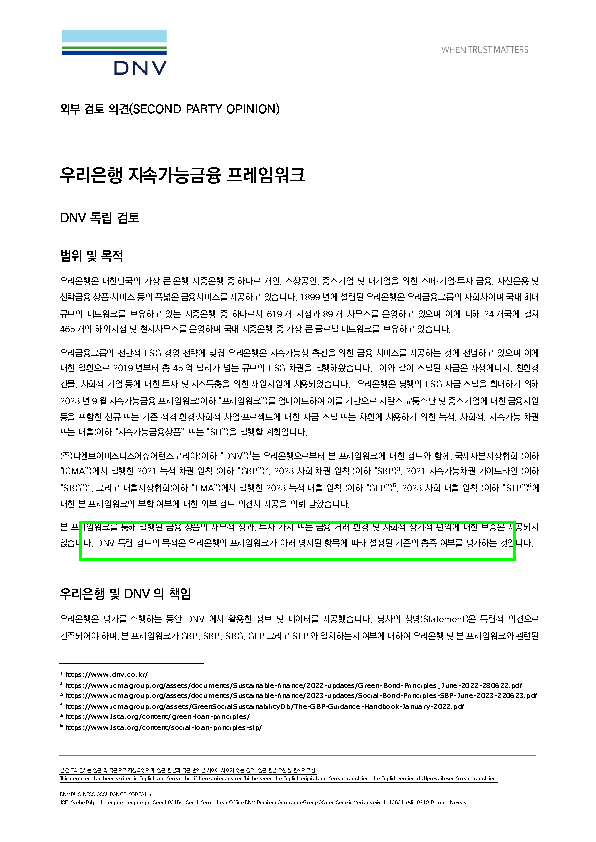

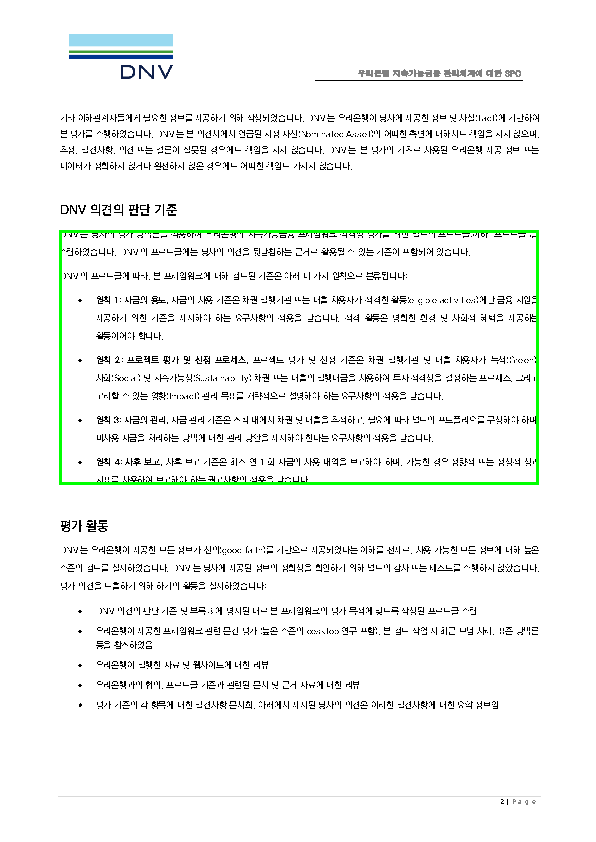

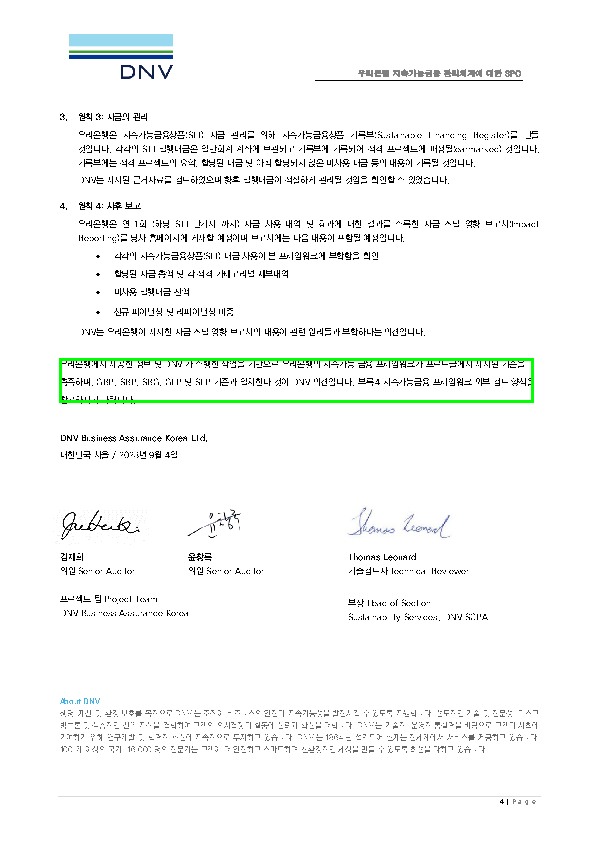

In [29]:
for vr in vis_res:
    vr.show()

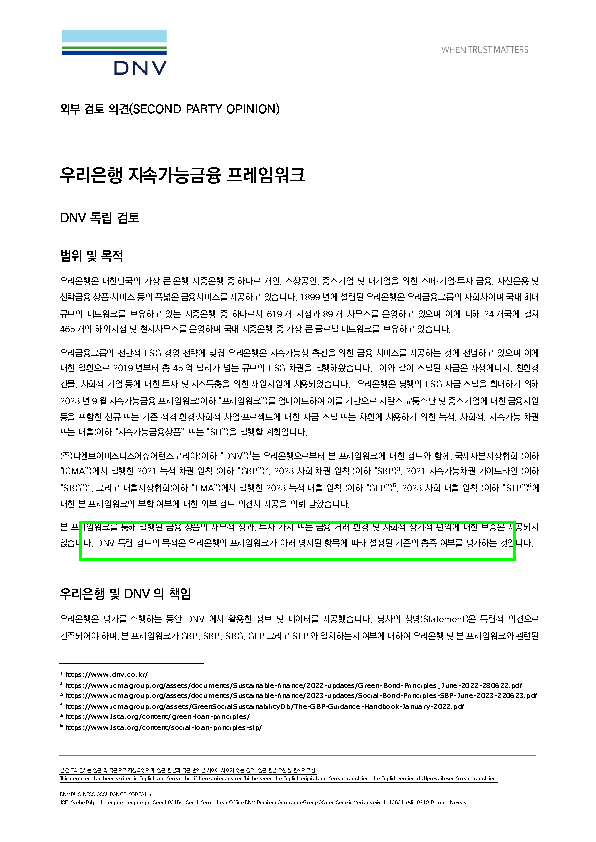

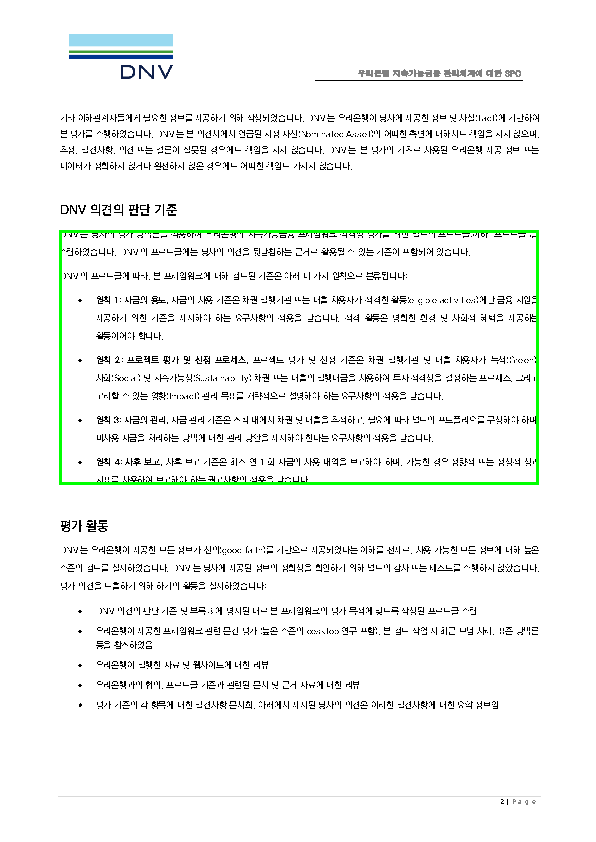

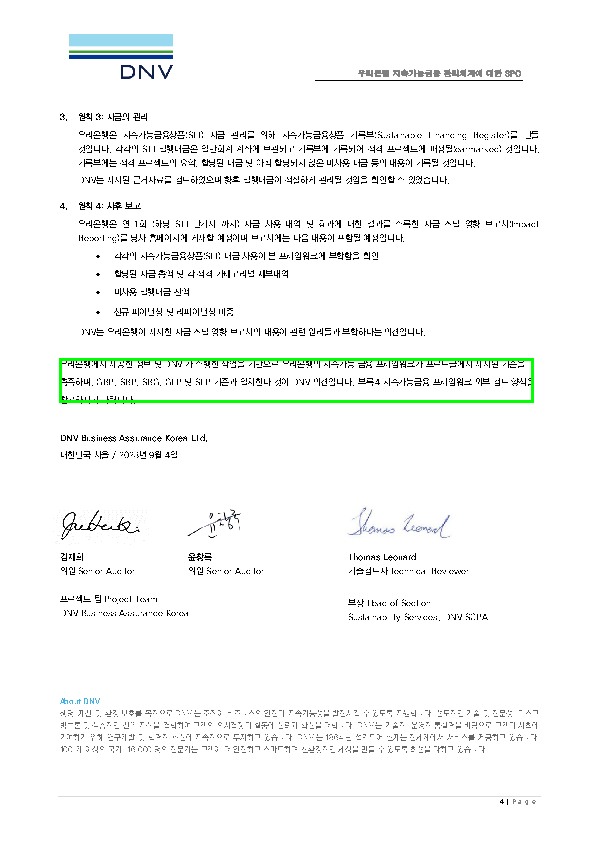

In [23]:
for page in response["pages"]:
    img_data = base64.b64decode(page["page"])
    page_img = Image.open(io.BytesIO(img_data))
    # display(page_img)
    for annotation in response["annotations"]:
        if annotation["page_num"]==page["page_num"]:
            bbox=list(map(lambda x : float(x),annotation["bbox"]))
            box_color=tuple(map(lambda x : int(x),annotation["box_color"]))
            # page_img.draw_rect(bbox, stroke=box_color, stroke_width=3)
            draw = ImageDraw.Draw(page_img)
            draw.rectangle(bbox, outline=box_color, width = 3)
    page_img.show()

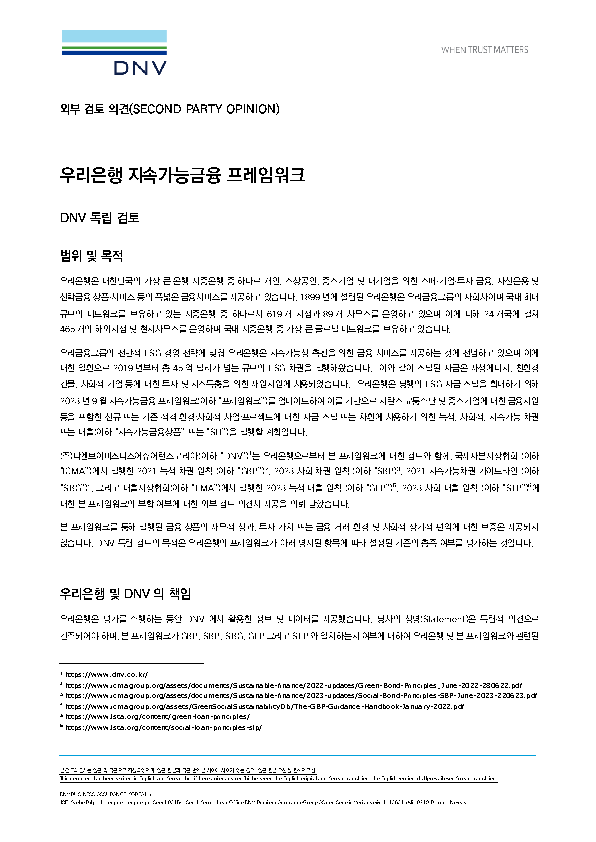

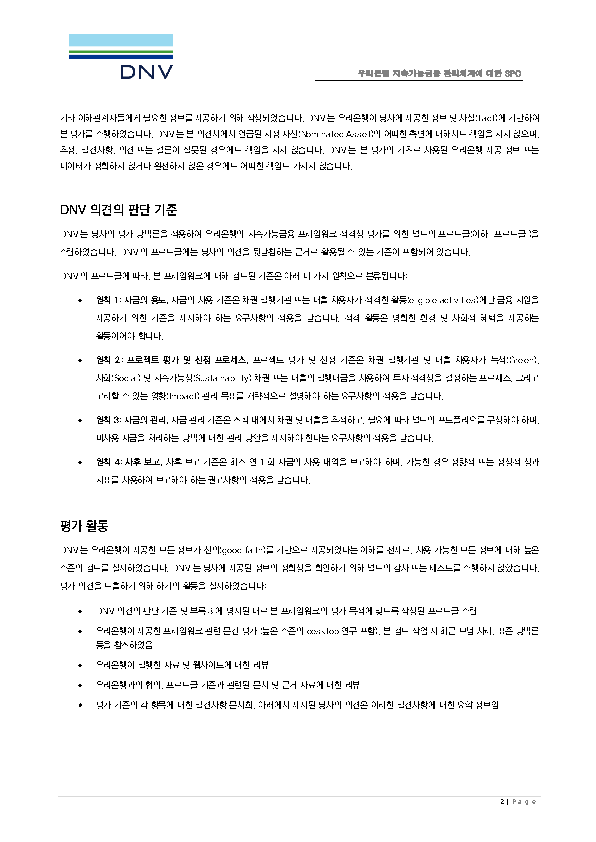

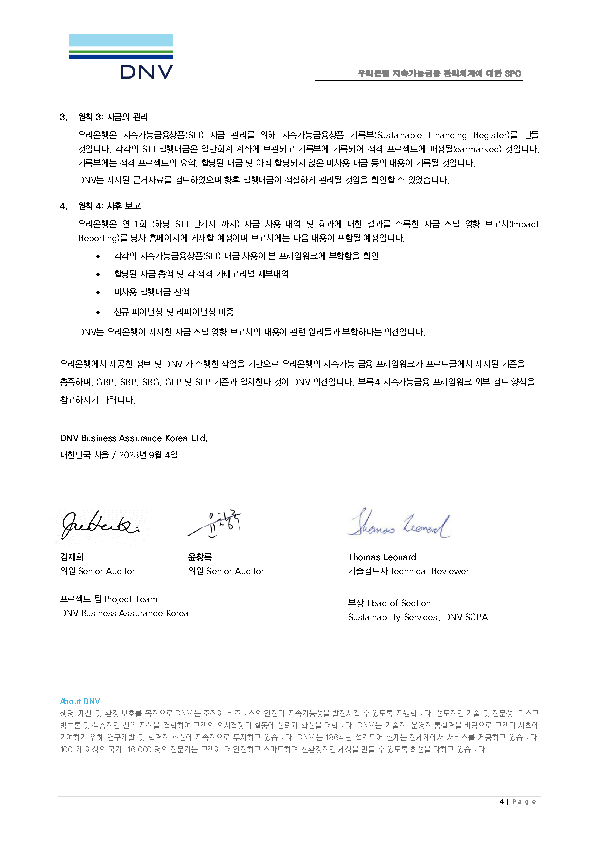

In [69]:
from io import BytesIO
import base64,io
from PIL import Image, ImageDraw
for i in response["vis_img"]:
    img_data = base64.b64decode(i)
    img = Image.open(io.BytesIO(img_data))
    display(img)

In [62]:
len(response["vis_img"])

1

In [63]:
response

{'response': '우리은행의 지속가능 금융 프레임워크는 다음과 같은 네 가지 원칙을 기반으로 DNV의 검토를 받았습니다:\n\n1. **자금의 용도**: 자금이 적격 활동에만 사용되어야 하며, 이러한 활동은 명확한 환경 및 사회적 혜택을 제공해야 합니다.\n2. **프로젝트 평가 및 선정 프로세스**: 적격성 평가 프로세스 및 영향 관리 목표를 설명해야 합니다.\n3. **자금의 관리**: 조직 내에서 자금을 추적하고, 필요시 별도 포트폴리오를 구성하며, 미사용 자금을 관리하는 방법을 제시해야 합니다.\n4. **사후 보고**: 최소 연 1회 자금 사용 내역을 보고하고, 가능한 경우 정량적 또는 정성적 성과 지표를 사용해 보고해야 합니다.\n\n이 프레임워크는 GBP, SBP, SBG, GLP 및 SLP 기준과 일치하는 것으로 평가되었습니다. 자세한 내용은 DNV의 외부 검토 양식을 참조하시기 바랍니다.',
 'annotations': [{'page_num': 4,
   'bbox': ['59.02810229816921',
    '358.868842651315',
    '533.7724128547862',
    '402.782582674846'],
   'box_color': ['0', '255', '0']},
  {'page_num': 2,
   'bbox': ['59.74795720424444',
    '230.00721209046165',
    '538.8113971973129',
    '484.8508837024286'],
   'box_color': ['0', '255', '0']},
  {'page_num': 1,
   'bbox': ['79.18403966827577',
    '521.2057012628927',
    '515.7760402029054',
    '560.4401083330968'],
   'box_color': ['0', '255', '0']}],
 'vis_img': ['iVBORw0KGgoAAAANSUhE